# Drawing XZ

In [1]:
from diffractio import sp, nm, plt, np, mm, degrees, um
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_masks_X import Scalar_mask_X


In [2]:
x0 = np.linspace(-250 * um, 250 * um, 1024 * 2)
z0 = np.linspace(-0.1 * mm, .6 * mm, 1024 * 2)
wavelength = 10 * um

In [3]:
u0 = Scalar_source_X(x0, wavelength)
u0.plane_wave(A=1, theta=0 * degrees)

In [4]:
lens = Scalar_mask_XZ(x0, z0, wavelength, n_background=1, info='')
ipasa, conds = lens.aspheric_lens(r0=(0 * mm, 0 * mm),
                                  angle=(0 * degrees, (0 * mm, 0 * mm)),
                                  refractive_index=1.5,
                                  cx=(1 / (.25 * mm), -1 / (.25 * mm)),
                                  Qx=(0, 0),
                                  a2=(0, 1e-13),
                                  a3=(0, 0),
                                  a4=(0, 0),
                                  depth=.25 * mm,
                                  size=0.8 * mm)

lens.slit(r0=(0, 100 * um),
          aperture=400 * um,
          depth=75 * um,
          refractive_index=1 + 2j)


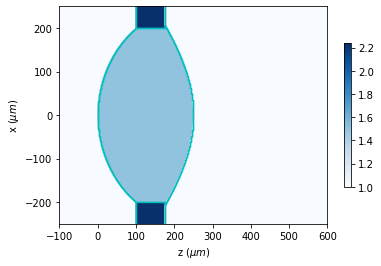

In [5]:
lens.draw_refractive_index(draw_borders=True,
                           min_incr=0.01,
                           colorbar_kind='vertical')


In [6]:
lens.incident_field(u0)

In [7]:
lens.clear_field()
lens.WPM(verbose=False, has_edges=False)

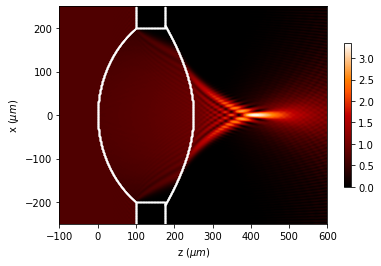

In [8]:
lens.draw(kind='intensity',
          logarithm=True,
          draw_borders=True,
          colorbar_kind='vertical')


In [9]:
Intensity_WPM = lens.intensity()

In [10]:
x_f, z_f = lens.search_focus()


x = -0.122 um, z = 408.842 um


In [11]:
ylim_max = 100 * um
zlim_max = 150 * um


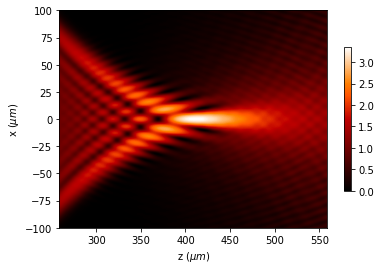

In [12]:
lens.draw(kind='intensity', logarithm=True, colorbar_kind='vertical')
plt.ylim(-ylim_max, ylim_max)
plt.xlim(z_f - zlim_max, z_f + zlim_max)


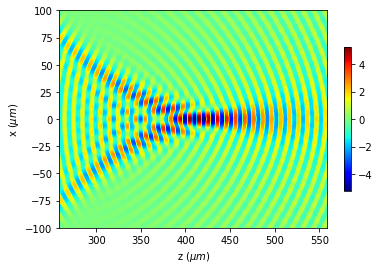

In [13]:
lens.draw(kind='amplitude', colorbar_kind='vertical')
plt.ylim(-ylim_max, ylim_max)
plt.xlim(z_f - zlim_max, z_f + zlim_max)


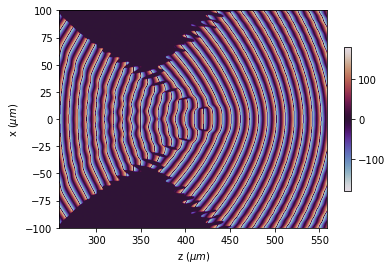

In [14]:
lens.draw(kind='phase',
          draw_borders=True,
          colorbar_kind='vertical',
          percentage_intensity=0.005)
plt.ylim(-ylim_max, ylim_max)
plt.xlim(z_f - zlim_max, z_f + zlim_max)


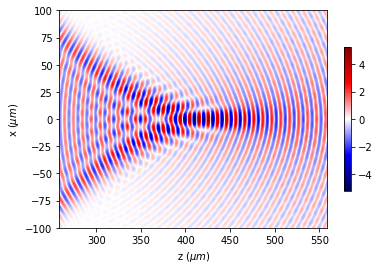

In [15]:
lens.draw(kind='real', colorbar_kind='vertical')
plt.ylim(-ylim_max, ylim_max)
plt.xlim(z_f - zlim_max, z_f + zlim_max)


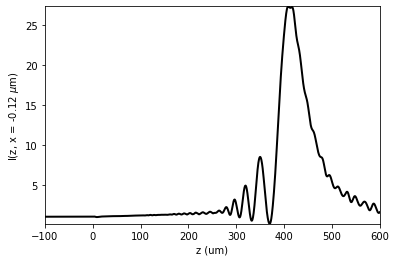

In [16]:
lens.profile_longitudinal(kind='intensity', logarithm=False, x0=x_f)

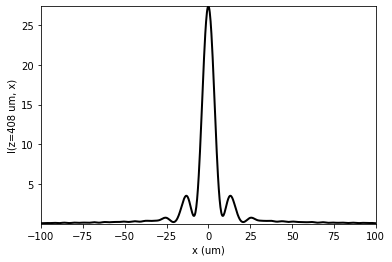

In [17]:
lens.profile_transversal(kind='intensity', logarithm=False, z0=z_f)
plt.xlim(-100, 100)


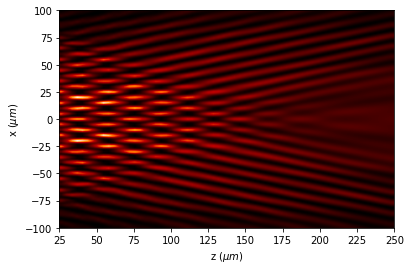

In [18]:
filename = 'video_xz'

length = 200 * um
wavelength = 5 * um
period = 25 * um
z_talbot = 2 * period**2 / wavelength
x0 = np.linspace(-length / 2, length / 2, 256)
z0 = np.linspace(25 * um, 1 * z_talbot, 64)

u0 = Scalar_source_X(x0, wavelength)
u0.gauss_beam(A=1, x0=0 * um, z0=-100 * um, w0=100 * um, theta=0 * degrees)

t1 = Scalar_mask_X(x0, wavelength)
t1.ronchi_grating(x0=0 * um, period=10 * um, fill_factor=0.5)

u1 = Scalar_field_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(t1 * u0)
u1.RS()

u1.draw(kind='intensity',
        logarithm=False,
        normalize='maximum',
        draw_borders=True,
        filename='')


In [19]:
seconds = 1.
u1.video(kind='intensity',
         logarithm=True,
         normalize=False,
         time_video=10 * seconds,
         frames_reduction=5,
         filename='creating_video.mp4',
         dpi=100)


## Visualizing fields using interactive tools

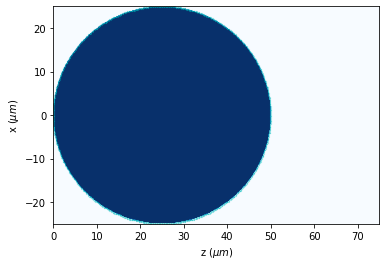

In [20]:
x0 = np.linspace(-25 * um, 25 * um, 256)
z0 = np.linspace(0 * um, 75 * um, 512)
wavelength = 2 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0 * degrees)
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)
u1.mask_field(size_edge=5 * um)
u1.cylinder(r0=(0 * um, 25 * um),
          radius=25*um,
          refractive_index=1.5)
u1.draw_refractive_index(scale='scaled')

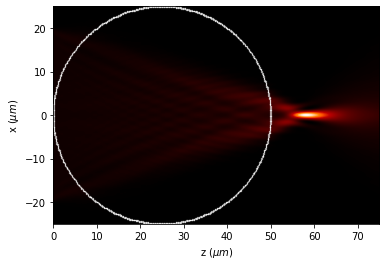

In [21]:
u1.clear_field()
u1.WPM(verbose=False)
u1.draw(scale='scaled', draw_borders=True)

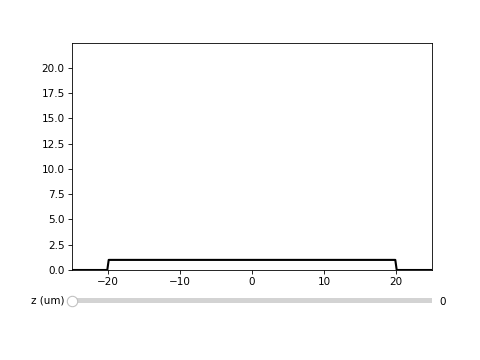

In [24]:
%matplotlib widget
u1.draw_profiles_interactive(kind='intensity')

<img src="qt3.png" width="400">

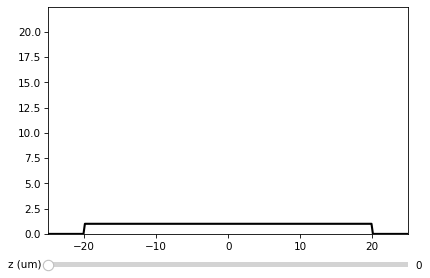

In [23]:
%matplotlib inline